# Parcial 2 robotica industrial 

# repositorio 
# https://github.com/cristianchernandezs/Parcial_2_robotica

In [39]:
from roboticstoolbox import DHRobot,RevoluteDH,PrismaticDH
import roboticstoolbox as rtb
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from spatialmath import *
from roboticstoolbox.backends.swift import Swift



In [40]:
robot = rtb.models.UR5()

In [41]:
print(robot)
print(robot.links)
print(robot.qr)

ERobot: UR5 (by Universal Robotics), 6 joints (RRRRRR), 2 branches, dynamics, geometry, collision
┌───┬────────────────┬───────┬────────────────┬──────────────────────────────────────────────────────────────────────┐
│id │      link      │ joint │     parent     │                                 ETS                                  │
├───┼────────────────┼───────┼────────────────┼──────────────────────────────────────────────────────────────────────┤
│11 │ world          │       │ BASE           │ {world} = {BASE}                                                     │
│ 1 │ base_link      │       │ world          │ {base_link} = {world}                                                │
│ 2 │ shoulder_link  │     0 │ base_link      │ {shoulder_link} = {base_link} ⊕ tz(0.08916) ⊕ Rz(q0)                 │
│ 3 │ upper_arm_link │     1 │ shoulder_link  │ {upper_arm_link} = {shoulder_link} ⊕ ty(0.1358) ⊕ Ry(90°) ⊕ Ry(q1)   │
│ 4 │ forearm_link   │     2 │ upper_arm_link │ {forearm_link} = {upp

In [42]:
robot.plot(robot.qr,backend='swift',block=True)

KeyboardInterrupt: 

In [43]:
punto1=SE3(  x=300, y=255, z=200)
punto2=SE3(  x=300, y=255, z=85)
punto3=SE3( x=370, y=255, z=85)
punto4=SE3( x=370, y=255, z=600)


In [44]:
trayegrafc1=rtb.ctraj(punto4, punto3, 150)
trayegrafc2=rtb.ctraj(punto3, punto2, 150)
trayegrafc3=rtb.ctraj(punto2, punto1, 150)


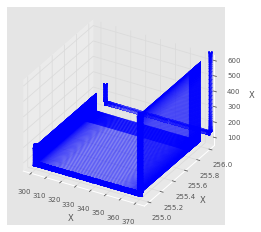

In [45]:
trayegrafc1.plot()
trayegrafc2.plot()
trayegrafc3.plot()


In [46]:
P1=SE3(x=3.0,y=2.5,z=2.0)
P2=SE3(x=3.0,y=2.5,z=0.8)
P3=SE3(x=3.7,y=2.5,z=0.8)
P4=SE3(x=3.7,y=2.5,z=6.0)


In [47]:
pp1 = robot.ikine_min(P1)
pp2 = robot.ikine_min(P2)
pp3 = robot.ikine_min(P3)
pp4 = robot.ikine_min(P4)


In [48]:
TrayC1=rtb.ctraj(P4, P3, 150)
TrayC2=rtb.ctraj(P3, P2, 150)
TrayC3=rtb.ctraj(P2, P1, 150)


In [49]:
InvertrayecC1=robot.ikine_min(TrayC1)
InvertrayecC2=robot.ikine_min(TrayC2)
InvertrayecC3=robot.ikine_min(TrayC3)


In [50]:
print(InvertrayecC1)

[IKsolution(q=array([-2.31353647e+00, -3.23410319e+05, -3.23408114e+05, -3.23402797e+05,  8.25361170e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=29, residual=22.951383320203337), IKsolution(q=array([-2.31354789e+00, -3.23410319e+05, -3.23408114e+05, -3.23402796e+05,  8.25370067e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=10, residual=22.94839771463778), IKsolution(q=array([-2.31358203e+00, -3.23410319e+05, -3.23408114e+05, -3.23402796e+05,  8.25395932e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=13, residual=22.939442649575522), IKsolution(q=array([-2.31363924e+00, -3.23410320e+05, -3.23408114e+05, -3.23402796e+05,  8.25439711e-01, -3.23408093e+05]), success=True, reason='Optimization terminated successfully', iterations=11, residual=22.924523379787093), IKsolution(q=array([-2.31371914e+00, -3.23410320e+05, -3.23408114e+05, -3.234027

In [51]:
print(InvertrayecC4)

[IKsolution(q=array([-2.26371847e+00, -3.23410291e+05, -3.23408114e+05, -3.23402823e+05,  7.76318752e-01, -3.23408094e+05]), success=True, reason='Optimization terminated successfully', iterations=29, residual=21.93964287827203), IKsolution(q=array([-2.26372719e+00, -3.23410291e+05, -3.23408114e+05, -3.23402823e+05,  7.76327246e-01, -3.23408094e+05]), success=True, reason='Optimization terminated successfully', iterations=8, residual=21.93980617726522), IKsolution(q=array([-2.26375401e+00, -3.23410291e+05, -3.23408114e+05, -3.23402823e+05,  7.76353803e-01, -3.23408094e+05]), success=True, reason='Optimization terminated successfully', iterations=12, residual=21.94029608961297), IKsolution(q=array([-2.26379865e+00, -3.23410291e+05, -3.23408114e+05, -3.23402823e+05,  7.76397893e-01, -3.23408094e+05]), success=True, reason='Optimization terminated successfully', iterations=17, residual=21.941112661420018), IKsolution(q=array([-2.26386110e+00, -3.23410291e+05, -3.23408114e+05, -3.23402822e

In [52]:
Trayec1 = rtb.jtraj(InvertrayecC1[0].q, InvertrayecC1[-1].q, 150)
Trayec2 = rtb.jtraj(InvertrayecC2[0].q, InvertrayecC2[-1].q, 150)
Trayec3 = rtb.jtraj(InvertrayecC3[0].q, InvertrayecC3[-1].q, 150)


In [53]:
robot.plot(Trayec1.q,block=False)
robot.plot(Trayec2.q,block=False)
robot.plot(Trayec3.q,block=False)



Swift backend, t = 7.499999999999981, scene:
  UR5

C:\Users\k-ami\anaconda3\lib\site-packages\roboticstoolbox\tools\trajectory.py:214: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(self.t, self.sd, "-o", **plotopts)
C:\Users\k-ami\anaconda3\lib\site-packages\roboticstoolbox\tools\trajectory.py:225: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(self.t, self.sdd, "-o", **plotopts)


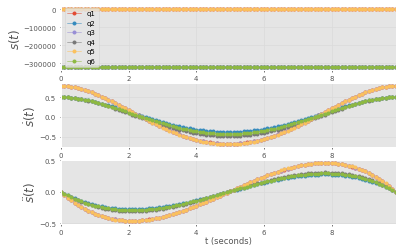

In [54]:
traj = rtb.jtraj(pp1.q, pp2.q, np.arange(0,10,0.1), qd0=np.array([pi/4, 0.5, pi/4, 0.5, pi/4, 0.5]),qd1=np.array
([pi/4, 0.5, pi/4, 0.5, pi/4, 0.5]))
traj.plot()
#https://petercorke.github.io/robotics-toolbox-python/arm_trajectory.html
#posicion, velocidad y aceleracion

In [55]:
vg1 = robot.jacob0(pp1.q)
vg2 = robot.jacob0(pp2.q)
vg3 = robot.jacob0(pp3.q)
vg4 = robot.jacob0(pp4.q)



In [56]:
vm1=np.linalg.pinv(robot.jacob0(pp1.q))
vm2=np.linalg.pinv(robot.jacob0(pp2.q))
vm3=np.linalg.pinv(robot.jacob0(pp3.q))
vm4=np.linalg.pinv(robot.jacob0(pp4.q))

#https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html